# 필요한 라이브러리들 불러오기

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# MNIST 데이터셋으로 학습한 모형 제출

Epoch 1/50
469/469 - 18s - loss: 0.4020 - accuracy: 0.8972 - val_loss: 0.1832 - val_accuracy: 0.9448 - 18s/epoch - 38ms/step
Epoch 2/50
469/469 - 16s - loss: 0.1438 - accuracy: 0.9582 - val_loss: 0.1164 - val_accuracy: 0.9657 - 16s/epoch - 33ms/step
Epoch 3/50
469/469 - 15s - loss: 0.0982 - accuracy: 0.9713 - val_loss: 0.0914 - val_accuracy: 0.9713 - 15s/epoch - 33ms/step
Epoch 4/50
469/469 - 16s - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0777 - val_accuracy: 0.9752 - 16s/epoch - 34ms/step
Epoch 5/50
469/469 - 16s - loss: 0.0554 - accuracy: 0.9840 - val_loss: 0.0741 - val_accuracy: 0.9756 - 16s/epoch - 34ms/step
Epoch 6/50
469/469 - 15s - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.0666 - val_accuracy: 0.9788 - 15s/epoch - 33ms/step
Epoch 7/50
469/469 - 15s - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0685 - val_accuracy: 0.9782 - 15s/epoch - 33ms/step
Epoch 8/50
469/469 - 15s - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.0674 - val_accuracy: 0.9796 - 15s/epoch - 33ms/step


C:\Users\bassi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


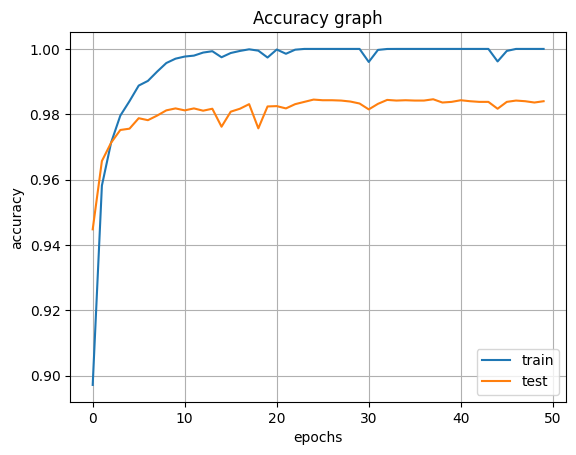

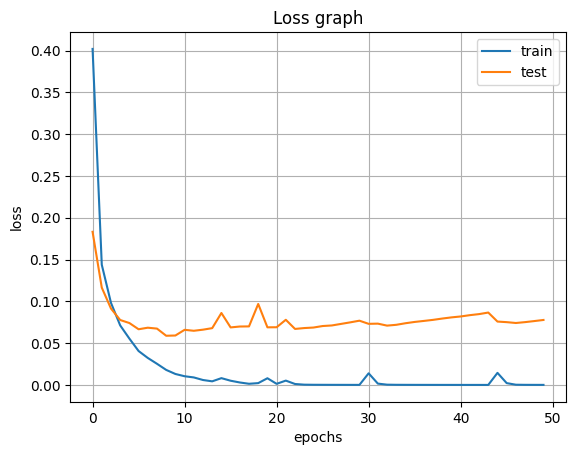

In [23]:
# 필요한 라이브러리 및 모듈 불러오기
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

# 입력 데이터를 1차원으로 평탄화하고 픽셀 값을 0에서 1 사이로 정규화
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 레이블을 원-핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)  # 변수 이름 수정

# Sequential 모델 생성
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일: 손실 함수, 옵티마이저 및 평가 지표 설정
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 모델 훈련: 훈련 데이터로 모델을 학습하고 검증 데이터로 성능을 평가
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test_one_hot), verbose=2)

# 테스트 데이터에서 정확도 평가 및 출력
print('정확률=', dmlp.evaluate(x_test, y_test_one_hot, verbose=0)[1] * 100)

dmlp.save('dmlp_trained.h5')

# 훈련 중의 정확도 및 손실을 그래프로 시각화
import matplotlib.pyplot as plt


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()


# CIFAR 10 데이터셋으로 학습한 모형 제출

Epoch 1/50
391/391 - 28s - loss: 1.8192 - accuracy: 0.3505 - val_loss: 1.6600 - val_accuracy: 0.4123 - 28s/epoch - 73ms/step
Epoch 2/50
391/391 - 26s - loss: 1.6200 - accuracy: 0.4235 - val_loss: 1.5874 - val_accuracy: 0.4349 - 26s/epoch - 67ms/step
Epoch 3/50
391/391 - 26s - loss: 1.5370 - accuracy: 0.4544 - val_loss: 1.5006 - val_accuracy: 0.4687 - 26s/epoch - 66ms/step
Epoch 4/50
391/391 - 26s - loss: 1.4706 - accuracy: 0.4779 - val_loss: 1.4932 - val_accuracy: 0.4699 - 26s/epoch - 66ms/step
Epoch 5/50
391/391 - 26s - loss: 1.4297 - accuracy: 0.4910 - val_loss: 1.4468 - val_accuracy: 0.4800 - 26s/epoch - 66ms/step
Epoch 6/50
391/391 - 26s - loss: 1.3812 - accuracy: 0.5102 - val_loss: 1.4409 - val_accuracy: 0.4869 - 26s/epoch - 67ms/step
Epoch 7/50
391/391 - 25s - loss: 1.3435 - accuracy: 0.5243 - val_loss: 1.3841 - val_accuracy: 0.5102 - 25s/epoch - 65ms/step
Epoch 8/50
391/391 - 25s - loss: 1.3059 - accuracy: 0.5411 - val_loss: 1.3547 - val_accuracy: 0.5183 - 25s/epoch - 64ms/step


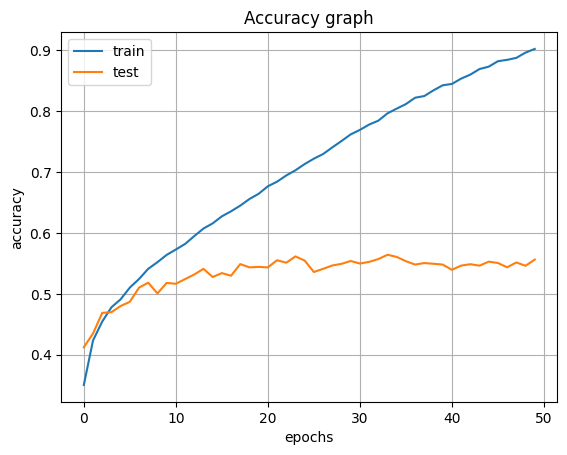

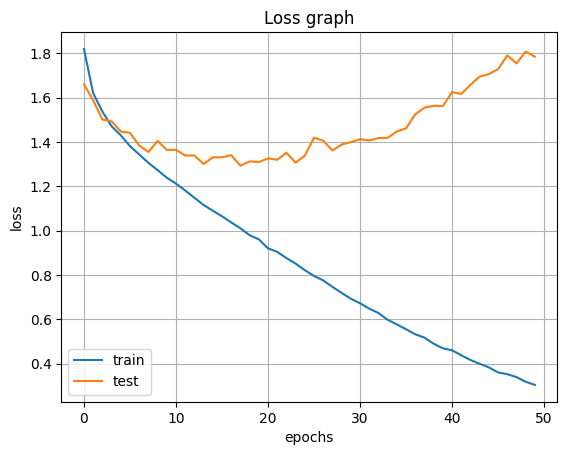

In [22]:
# 필요한 라이브러리 및 모듈 불러오기
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()

# 입력 데이터를 1차원으로 평탄화하고 픽셀 값을 0에서 1 사이로 정규화
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# 레이블을 원-핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)  # 변수 이름 수정

# Sequential 모델 생성
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일: 손실 함수, 옵티마이저 및 평가 지표 설정
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 모델 훈련: 훈련 데이터로 모델을 학습하고 검증 데이터로 성능을 평가
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test_one_hot), verbose=2)

# 테스트 데이터에서 정확도 평가 및 출력
print('정확률=', dmlp.evaluate(x_test, y_test_one_hot, verbose=0)[1] * 100)

# 훈련 중의 정확도 및 손실을 그래프로 시각화
import matplotlib.pyplot as plt


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()
